# Análises Avançadas de Inferência

Este notebook complementa o projeto GS 2025.1 com análises estatísticas e visuais detalhadas, auxiliando na compreensão da performance do modelo e no comportamento dos dados inferidos.

In [12]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

# Caminho para o banco de dados
DB_PATH = os.path.join('..', '..', 'data', 'gs_deslizamento.db')
conn = sqlite3.connect(DB_PATH)
df = pd.read_sql_query("SELECT * FROM inferencias", conn)
conn.close()

# Conversão de timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values('timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()


,id,timestamp,umidade,chuva,acc_z,classe
0,1,2025-06-02 00:25:52.132512,100.0,150.0,19.61,ok
1,2,2025-06-02 00:25:54.402751,100.0,150.0,19.61,ok
2,3,2025-06-02 00:25:56.659392,100.0,150.0,19.61,ok
3,4,2025-06-02 00:25:58.956413,100.0,150.0,19.61,ok
4,5,2025-06-02 00:26:01.206538,100.0,138.0,19.61,ok


## 1. Correlação entre Sensores

A matriz de correlação indica o grau de relação linear entre os sensores. Valores próximos de 1 ou -1 indicam forte correlação positiva ou negativa, respectivamente.

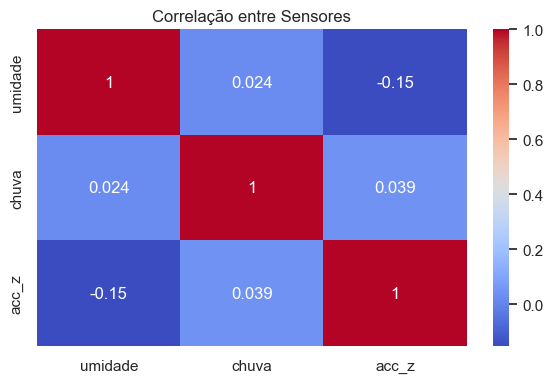

In [13]:

plt.figure(figsize=(6, 4))
sns.heatmap(df[['umidade', 'chuva', 'acc_z']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Sensores')
plt.tight_layout()
plt.show()


## 2. Distribuição Temporal de Alertas de Risco

Aqui visualizamos em que momentos do tempo ocorreram os alertas classificados como 'risco'. Isso pode ajudar a identificar padrões ou picos de perigo.

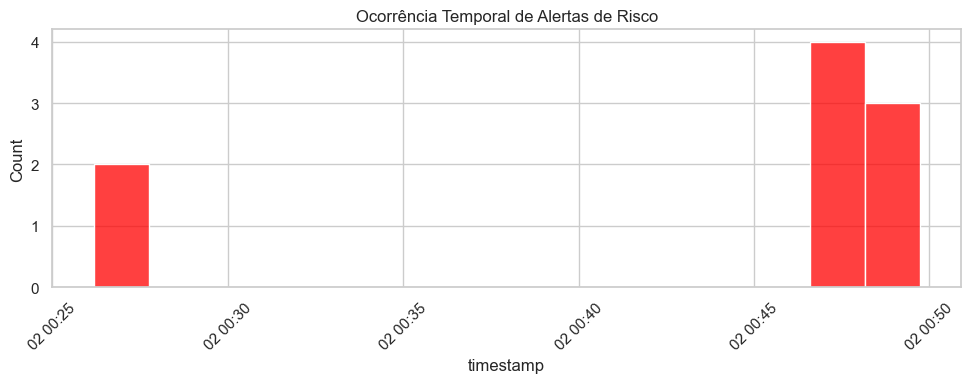

In [14]:

df_risco = df[df['classe'] == 'risco']
plt.figure(figsize=(10, 4))
sns.histplot(df_risco['timestamp'], bins=15, kde=False, color='red')
plt.title('Ocorrência Temporal de Alertas de Risco')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Dispersão entre Chuva e Aceleração Z

Esse gráfico mostra como os diferentes tipos de eventos (ok, atenção, risco) se distribuem no espaço de variáveis. Pode ajudar a visualizar zonas críticas.

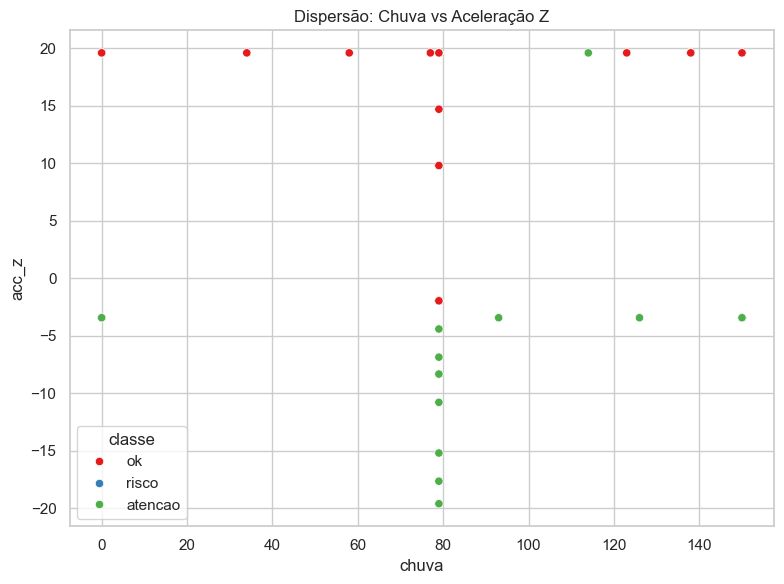

In [19]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='chuva', y='acc_z', hue='classe', palette='Set1')
plt.title('Dispersão: Chuva vs Aceleração Z')
plt.tight_layout()
plt.show()


## 4. Médias e Desvios por Classe
**Objetivo:** Analisar estatisticamente os valores médios e variações (desvios padrão) dos sensores para cada classe. Isso permite compreender os padrões típicos de cada situação: 'ok', 'atenção' e 'risco'.


In [16]:

df.groupby('classe')[['umidade', 'chuva', 'acc_z']].agg(['mean', 'std'])


umidade                  chuva                 acc_z           
              mean        std        mean        std       mean        std
classe                                                                    
atencao  58.250000  25.587446  101.375000  37.267322   2.554167  14.196719
ok       73.295455  20.468444   82.159091  51.739483  15.097955   8.501723
risco    15.777778  10.825638  142.000000   6.000000  11.930000  11.520000

## 5. Evolução dos Sensores ao Longo do Tempo

Visualização temporal das leituras dos sensores. Ajuda a identificar tendências, oscilações e possíveis anomalias nos dados coletados.

C:\Users\josea\AppData\Local\Temp\ipykernel_4900\1066348783.py:7: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\projetos\1TIAOR20242-Global-Solutions-GS-20251\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


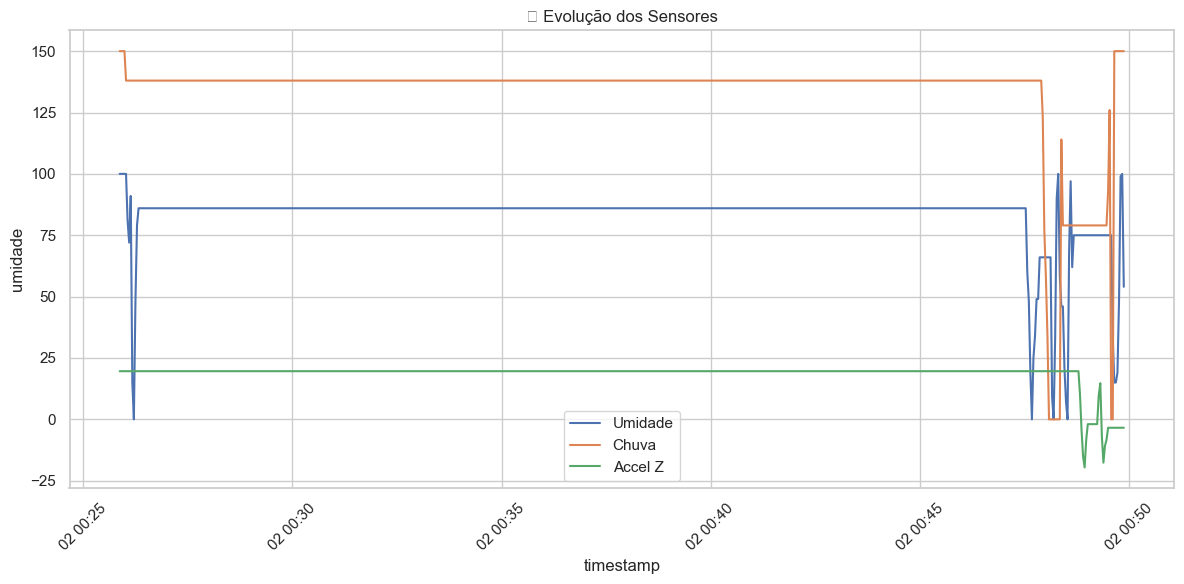

In [17]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="timestamp", y="umidade", label="Umidade")
sns.lineplot(data=df, x="timestamp", y="chuva", label="Chuva")
sns.lineplot(data=df, x="timestamp", y="acc_z", label="Accel Z")
plt.title("📈 Evolução dos Sensores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6. Frequência das Classes Inferidas

Mostra a quantidade de vezes que cada classe foi prevista. Pode ser usada para avaliar o balanceamento do modelo frente aos dados reais.

C:\Users\josea\AppData\Local\Temp\ipykernel_4900\2184584337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="classe", palette="Set2")
C:\Users\josea\AppData\Local\Temp\ipykernel_4900\2184584337.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\projetos\1TIAOR20242-Global-Solutions-GS-20251\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


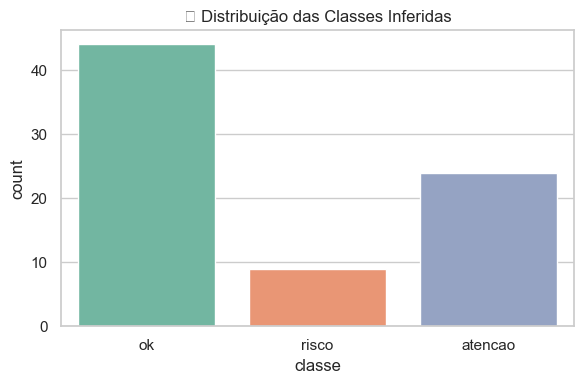

In [18]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="classe", palette="Set2")
plt.title("📊 Distribuição das Classes Inferidas")
plt.tight_layout()
plt.show()
